# Seaborn

Seaborn es una librería de visualización construida sobre Matplotlib y muy integrada con Pandas.

In [1]:
# Importaciones
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cambiar el estilo por defecto
sns.set_theme()

![Iris](../../img/iris.png "Iris species")



In [2]:
# Importar el conjunto de datos de prueba
iris = sns.load_dataset('iris')
print(iris['species'].unique())
iris.head()

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Gráficos en Seaborn

## Gráficos de ejes (axis-level) y gráficos de imagen (figure-level)

En Seaborn, hay dos tipos de gráficos:
* Gráficos de ejes: solo ocupan un eje. Aceptan el argumento `ax` y pueden usarse en subplots. Funcionan como los gráficos de Matplotlib. Representadas en las cajas pequeñas en la imagen.

* Gráficos de imagen: ocupan todo el espacio de la imagen. En consecuencia, no aceptan el argumento `ax` y no pueden agruparse en subplots. Contienen todas las funciones de ejes de una categoría, seleccionables a través del parámetro `kind`. Se gestionan a través de un objeto especial, `FacetGrid`. Representadas en las cajas grandes en la imagen. Permiten crear imágenes con múltiples gráficas rápidamente. Similares a sus contrapartidas de eje, pero con algunos cambios. Por ejemplo, la leyenda se coloca fuera de la imagen. 
    
![Figure- and axis-level plots](../../img/figure_axis_functions.png "Figure- and axis-level plots")

Las cajas grandes representan las funciones para generar gráficos de imagen, que contienen las funciones para gráficos de eje, recogidas en las cajas pequeñas.




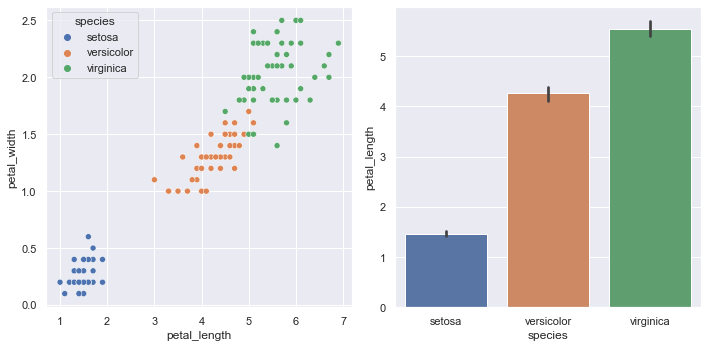

In [3]:
## Agrupando gráficos de eje
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species', ax = axs[0])
sns.barplot(data = iris, x = 'species', y = 'petal_length', ax = axs[1])
fig.tight_layout();

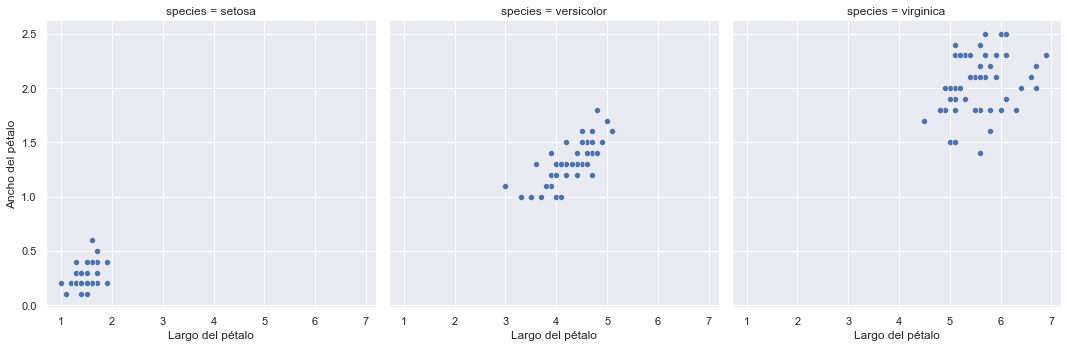

In [16]:
# Accediendo y modificando gráficos de imagen
# Personalización más limitada
fig = sns.relplot(
    data = iris, 
    x = 'petal_length', y = 'petal_width', 
    col = 'species', # Distinguir por especie
    kind = 'scatter' # Tipo de gráfico
    )
fig.set_axis_labels('Largo del pétalo', 'Ancho del pétalo');

###  Modificando el tamaño en gráficos de imagen

El tamaño de los subplots utiliza los parámetros `height` y `aspect` en lugar de `width` y `height` de Matplotlib. Se mide en pulgadas (1 pulgada = 2,5 cm). 

El tamaño de la imagen se calcula automáticamente en función del número de subplots y su tamaño.


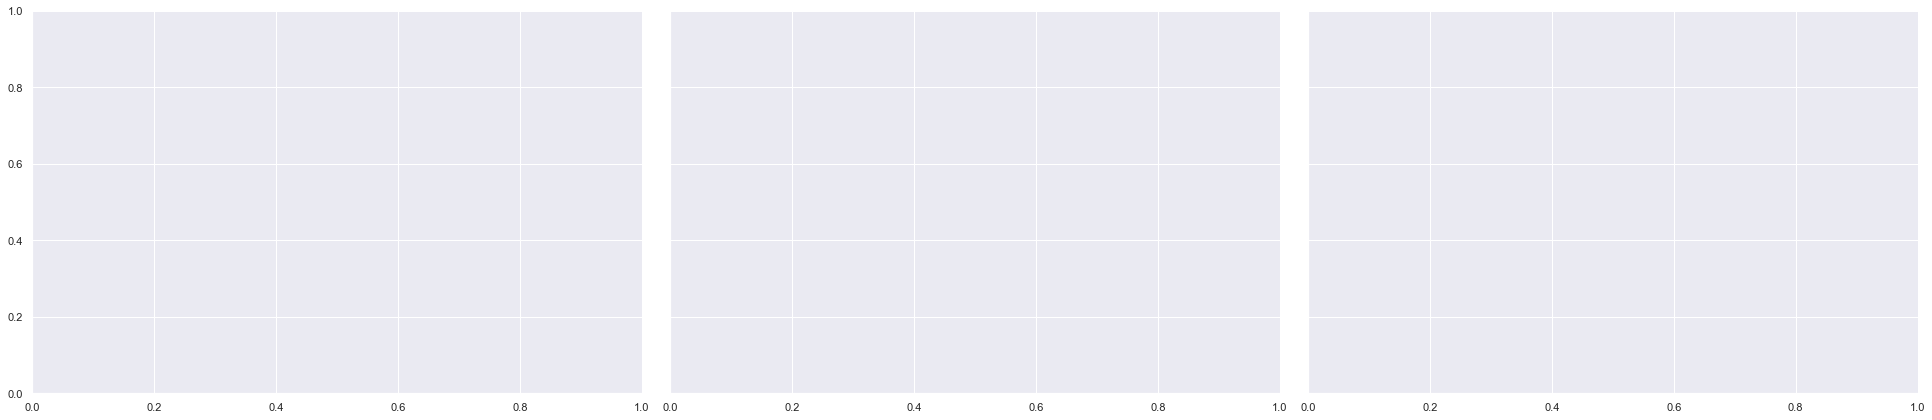

In [25]:
fig = sns.FacetGrid(iris, col = 'species', height = 6, aspect = 1.5);

## Muestra de gráficos

### Gráfico de dispersión

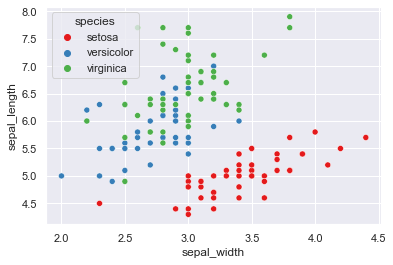

In [58]:
sns.scatterplot(
    data = iris,
    x = 'sepal_width',
    y = 'sepal_length',
    hue = 'species', # Distinguir colores por especie
    palette = 'Set1' # Definir colores
    );

### Gráfico de regresión

Similar al gráfico de dispersión, pero añade una regresión lineal.

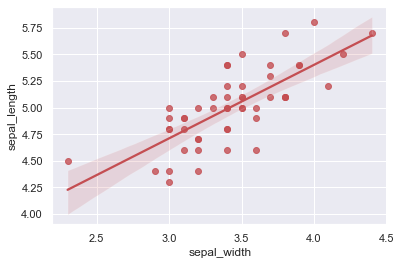

In [61]:
sns.regplot(
    data = iris[iris['species'] == 'setosa'],
    x = 'sepal_width',
    y = 'sepal_length',
    color = 'r'
    );

### Gráfico de línea

Si para un punto hay más de una instancia, Seaborn computará automáticamente intervalos de confianza.

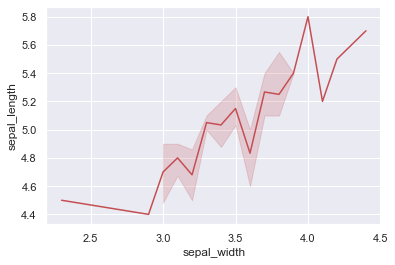

In [63]:
sns.lineplot(
    data = iris[iris['species'] == 'setosa'],
    x = 'sepal_width',
    y = 'sepal_length',
    color = 'r'
    );

### Gráfico de barras

La línea negra sobre las barras indica  la media de la variable indicada y su desviación típica.

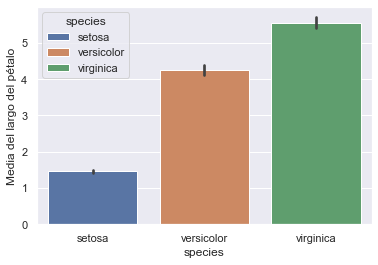

In [88]:
fig = sns.barplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    hue = 'species',
    dodge = False # Evita que las barras se separen demasiado
)
fig.set_ylabel('Media del largo del pétalo');

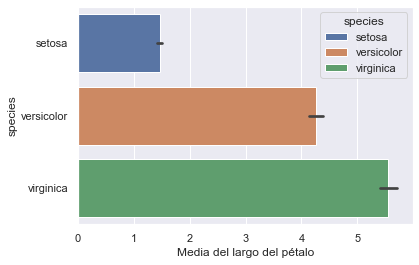

In [87]:
fig = sns.barplot(
    data = iris,
    x = 'petal_length',
    y = 'species',
    hue = 'species',
    dodge = False
)
fig.set_xlabel('Media del largo del pétalo');

### Histogramas

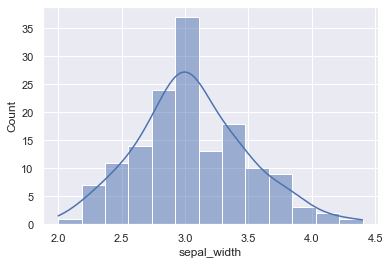

In [97]:
sns.histplot(
    data = iris,
    x = 'sepal_width',
    kde = True # Mostrar distribución de probabilidad
);

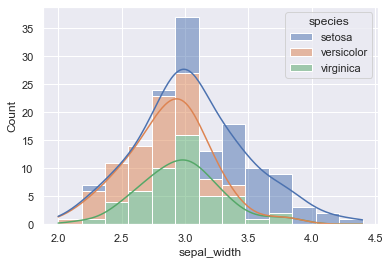

In [96]:
# Distinguir según especie
sns.histplot(
    data = iris,
    x = 'sepal_width',
    hue = 'species',
    multiple = 'stack'
);

### Mapa de calor (heatmap)

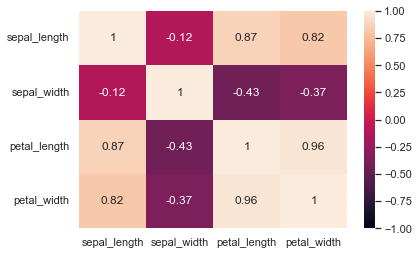

In [124]:
sns.heatmap(
    data = iris.corr(), # Correlaciones entre variables
    annot = True, # Mostrar valores de la tabla. En este caso, las correlaciones
    vmin = -1, # Valor máximo
    vmax = 1, # Valor mínimo
);

### Mapa de calor jerarquizado (clustered heatmap)

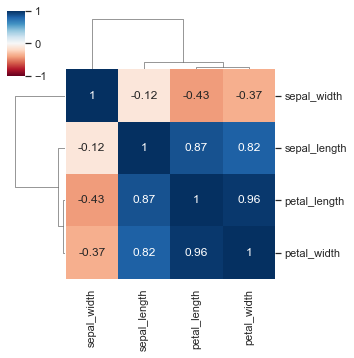

In [27]:
sns.clustermap(
    data = iris.corr(), # Correlaciones entre variables
    annot = True, # Mostrar valores de la tabla. En este caso, las correlaciones
    vmin = -1, # Valor máximo
    vmax = 1, # Valor mínimo
    figsize = (5, 5), # Cambiar tamaño de gráfico
    cmap = 'RdBu'
    );

### Gráfico de cajas (boxplot)

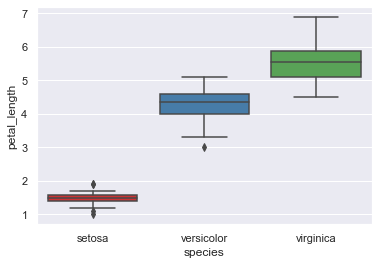

In [123]:
sns.boxplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    orient = 'v', # Orientación: 'h' para horizontal
    palette = 'Set1',
);

### Gráficos de violín (swarmplot)

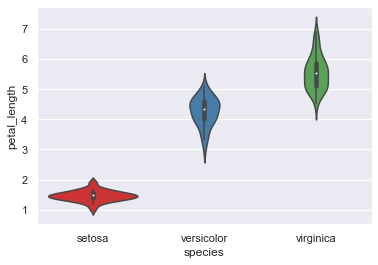

In [16]:
sns.violinplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    orient = 'v', # Orientación: 'h' para horizontal
    palette = 'Set1',
);

### Gráficos de enjambre (swarmplot)

c:\Users\jgcha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


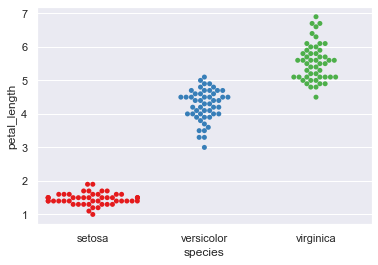

In [22]:
sns.swarmplot(
    data = iris,
    x = 'species',
    y = 'petal_length',
    orient = 'v', # Orientación: 'h' para horizontal
    palette = 'Set1',
);

### Stripplot

In [37]:
# Change to long format
iris_long = pd.melt(iris, 'species', var_name = 'measurement')
iris_long.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


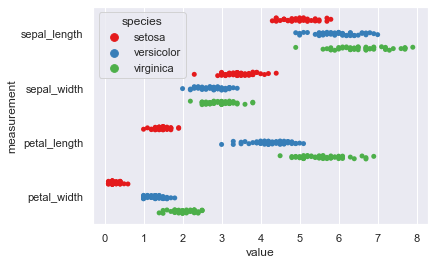

In [44]:
sns.stripplot(
    data = iris_long,
    x = 'value',
    y = 'measurement',
    hue = 'species',
    dodge = True, # Parea evitar solapamientos
    palette = 'Set1',
);

## Gráficos especiales

Los `jointplot` y `pairplot` combinan características de gráficos de relación y distribución en un solo gráfico de imagen.

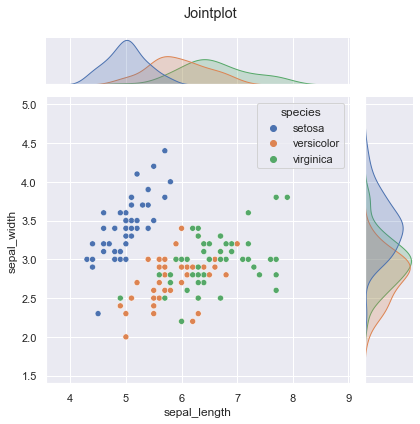

In [17]:
# Jointplot
# Util para ver relaciones y distribuciones a la vez
jointplot = sns.jointplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species');
jointplot.fig.suptitle('Jointplot')
jointplot.fig.tight_layout(); # Evitar solapamiento de título y gráfica

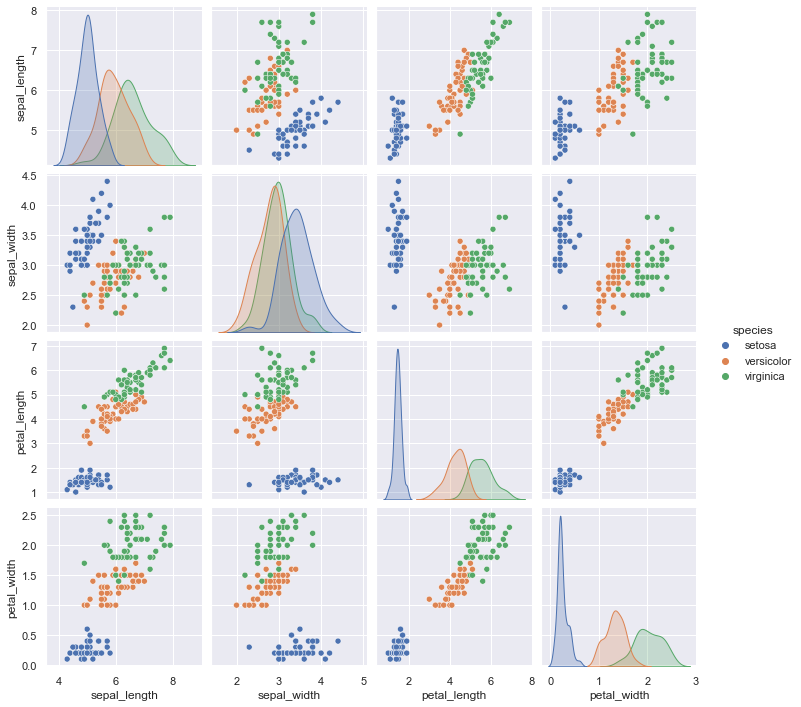

In [18]:
# Pairplot
pairplot = sns.pairplot(data = iris, hue = 'species');

# Paletas de colores

Seaborn cuenta con tres tipos de paletas de colores:
- Paletas cualitativas: para datos categóricos.
- Paletas secuenciales: para datos numéricos.
- Paletas divergentes: para datos numéricos con límites o puntos de referencia. 

## Paletas cualitativas

Utilizadas para representar un número limitado de categorías.

![Paletas de color cualitativas](../../img/seaborn_qualitative_colormaps.png "Paletas de color cualitativas")

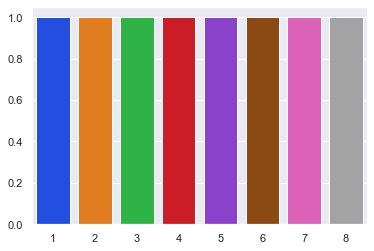

In [36]:
# Usa la paleta 'bright'
sns.barplot(x = list(range(1, 9)), y = [1] * 8, palette = 'bright');

## Paletas secuenciales

Contienen una escala continua de valores

![Paletas secuenciales](../../img/seaborn_sequential_palettes.jfif 'Paletas secuenciales')

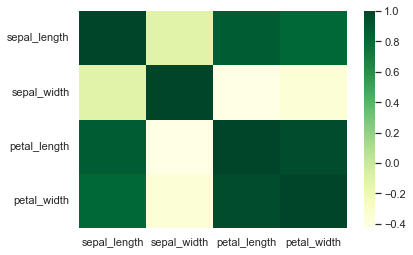

In [45]:
sns.heatmap(
    data = iris.corr(), # Correlación entre métricas
    cmap = 'YlGn' # Elegir paleta. Añade '_r' para invertir
    );

## Paletas divergentes

Similares a las continuas, pero con un punto de referencia a partir del cual nacen dos escalas continuas con colores distintos. Basado en el [modelo de color HSL](https://es.wikipedia.org/wiki/Modelo_de_color_HSL), requieren indicar el matiz del color de ambos extremos. Seaborn elegirá automáticamente la saturación y la intensidad. Por defecto, estos son 75 y 50, respectivamente.

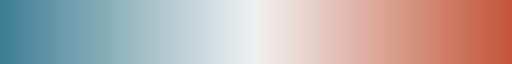

In [46]:
sns.diverging_palette(220, 20, as_cmap=True)

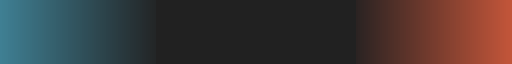

In [54]:
# Parámetros opcionales para las paletas divergentes
sns.diverging_palette(
    220, # Extremo izquierdo
    20, # Extremo derecho
    sep = 100, # Cuánto ocupa el color central
    center = 'dark', # Centro claro ('light') u oscuro ('dark')
    as_cmap = True # Devolver como paleta divergente y no categórica
)

# Enlaces de interés

* [Galería de ejemplos de Seaborn](https://seaborn.pydata.org/examples/index.html)
* [Selector de colores HSL](https://www.w3schools.com/colors/colors_hsl.asp)